In [1]:
import fastf1
from fastf1 import plotting
import matplotlib.pyplot as plt
import numpy as np

In [3]:
fastf1.Cache.enable_cache('cache')

In [ ]:
session = fastf1.get_session(2024, 'Las Vegas Strip Circuit', 'R')
session.load()

# Select drivers (e.g., VER and LEC)


events      WARNING 	Correcting user input 'Las Vegas Strip Circuit' to 'Las Vegas Grand Prix'
core           INFO 	Loading data for Las Vegas Grand Prix - Race [v3.4.4]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
r

In [28]:
driver1 = 'SAI'  # Max Verstappen
driver2 = 'LEC'  # Charles Leclerc

In [29]:
# Get the laps dataframe
laps = session.laps

# Filter laps for the driver and pick the fastest
lap1 = laps.pick_driver(driver1).pick_fastest()
lap2 = laps.pick_driver(driver2).pick_fastest()


c:\Users\rishu\AppData\Local\Programs\Python\Python312\Lib\site-packages\fastf1\core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
c:\Users\rishu\AppData\Local\Programs\Python\Python312\Lib\site-packages\fastf1\core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


In [30]:
telemetry1 = lap1.get_telemetry().add_distance()
telemetry2 = lap2.get_telemetry().add_distance()

In [31]:
distance = np.linspace(
    min(telemetry1['Distance'].min(), telemetry2['Distance'].min()),
    max(telemetry1['Distance'].max(), telemetry2['Distance'].max()),
    4000
)

In [32]:
speed1 = np.interp(distance, telemetry1['Distance'], telemetry1['Speed'])
speed2 = np.interp(distance, telemetry2['Distance'], telemetry2['Speed'])
x1 = np.interp(distance, telemetry1['Distance'], telemetry1['X'])
y1 = np.interp(distance, telemetry1['Distance'], telemetry1['Y'])

In [33]:
domination = np.where(speed1 > speed2, driver1, driver2)

c:\Users\rishu\AppData\Local\Programs\Python\Python312\Lib\site-packages\fastf1\plotting\_plotting.py:90: FutureWarning: FastF1 will no longer silently modify the default Matplotlib colors in the future.
To remove this warning, explicitly set `color_scheme=None` or `color_scheme='fastf1'` when calling `.setup_mpl()`.
  warnings.warn(
c:\Users\rishu\AppData\Local\Programs\Python\Python312\Lib\site-packages\fastf1\plotting\_plotting.py:98: FutureWarning: FastF1 will stop modifying the default Matplotlib settings in the future.
To opt-in to the new behaviour and remove this warning, explicitly set `misc_mpl_mods=False` when calling `.setup_mpl()`.
  warnings.warn(


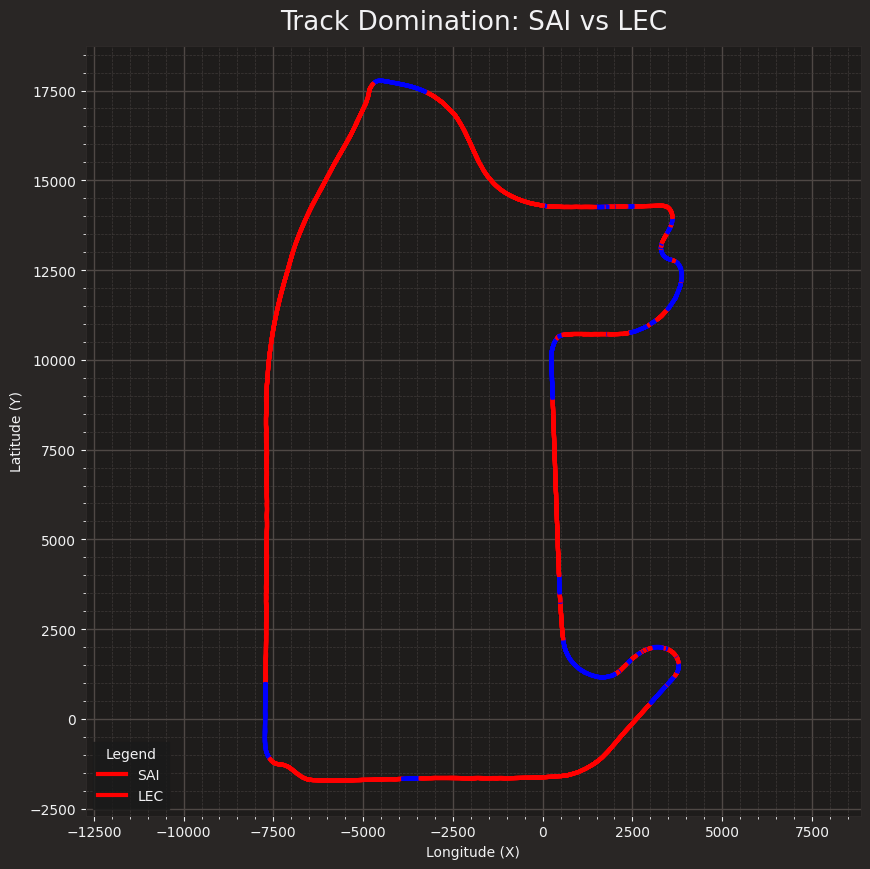

In [34]:
plotting.setup_mpl()
fig, ax = plt.subplots(figsize=(10, 10))

for i in range(len(distance) - 1):
    color = 'blue' if domination[i] == driver1 else 'red'
    ax.plot(x1[i:i+2], y1[i:i+2], color=color, linewidth=3)

# Add labels and customization
plt.title(f"Track Domination: {driver1} vs {driver2}")
plt.xlabel("Longitude (X)")
plt.ylabel("Latitude (Y)")
plt.legend([driver1, driver2], loc="lower left", title="Legend", frameon=True)
plt.axis('equal')  # Ensure the track shape is not distorted
plt.show()